<a href="https://colab.research.google.com/github/Riyanfebrisafputra/Riyan-Febri-Safputra/blob/main/TUGAS_10_RIYAN_FEBRI_SAFPUTRA_1101192462.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image
from imutils import paths
import numpy as np
import os
import cv2

In [ ]:
print("[INFO] Loading Images ...")
image_paths = paths.list_images('3scene')
data = []
labels = []

for image_path in image_paths :
  image = Image.open(image_path)
  image = np.array(image.resize((64,64))) / 255.0
  data.append(image)
  
  label = image_path.split(os.path.sep)[-2]
  labels.append(label)

[INFO] Loading Images ...


In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)

In [ ]:
model = Sequential(
    [
     Flatten(input_shape=(64*64*3,)),
     Dense(144, activation="relu", name="layer1"),
     Dense(24, activation="relu", name="layer2"),
     Dense(24, activation="relu", name="layer3"),
     Dense(24, activation="relu", name="layer4"),
     Dense(3, activation="softmax", name="layer5"),
    ]
)

In [ ]:
print("[INFO] training network ...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=65, batch_size=32)

[INFO] training network ...
Epoch 1/65
23/23 [==============================] - 0s 21ms/step - loss: 1.1993 - accuracy: 0.3924 - val_loss: 1.1267 - val_accuracy: 0.5232
Epoch 2/65
23/23 [==============================] - 0s 13ms/step - loss: 0.9727 - accuracy: 0.5246 - val_loss: 0.9065 - val_accuracy: 0.5401
Epoch 3/65
23/23 [==============================] - 0s 14ms/step - loss: 0.8809 - accuracy: 0.5907 - val_loss: 0.9150 - val_accuracy: 0.5527
Epoch 4/65
23/23 [==============================] - 0s 13ms/step - loss: 0.8202 - accuracy: 0.6315 - val_loss: 0.7772 - val_accuracy: 0.6878
Epoch 5/65
23/23 [==============================] - 0s 13ms/step - loss: 0.7132 - accuracy: 0.7060 - val_loss: 0.8245 - val_accuracy: 0.6414
Epoch 6/65
23/23 [==============================] - 0s 13ms/step - loss: 0.7328 - accuracy: 0.6850 - val_loss: 0.8050 - val_accuracy: 0.6287
Epoch 7/65
23/23 [==============================] - 0s 14ms/step - loss: 0.6534 - accuracy: 0.7468 - val_loss: 0.7703 - val_ac

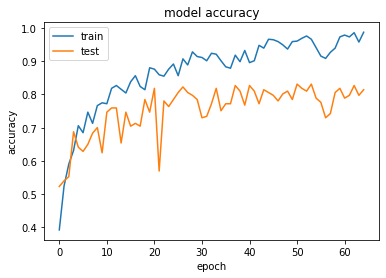

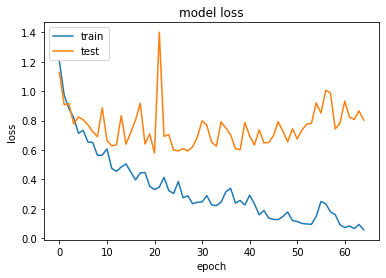

In [ ]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("[INFO] evaluating network ...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network ...
              precision    recall  f1-score   support

       coast       0.81      0.85      0.83        95
      forest       0.86      0.82      0.84        79
     highway       0.77      0.75      0.76        63

    accuracy                           0.81       237
   macro avg       0.81      0.81      0.81       237
weighted avg       0.81      0.81      0.81       237



In [ ]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


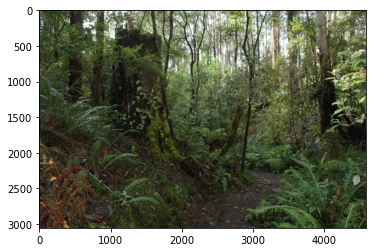

[[0.00408389 0.9945205  0.00139569]]
['forest']


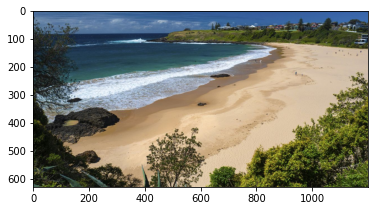

[[0.92347085 0.06498442 0.01154471]]
['coast']


In [ ]:
images = ['forest_test.jpg', 'coast_test.jpg']
for i in range(2) :
  img_array = cv2.imread(images[i])
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  plt.imshow(img_array)
  plt.show()
  image_test = Image.open(images[i])
  image_test = np.array(image_test.resize((64,64))) /255.0
  image_test = np.expand_dims(image_test, axis=0)
  output = model.predict(image_test, 1)
  print(output)
  print(lb.classes_[output.argmax(axis=1)])
